In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('fedpapers.csv')
df.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [3]:
#We don't need filename as we already have the author names
df.drop('filename', axis = 1, inplace = True)
df.head()

,author,a,all,also,an,and,any,are,as,at,...,was,were,what,when,which,who,will,with,would,your
0,dispt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,0.017,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,0.114,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,0.023,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,0.056,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,0.013,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


In [4]:
#we print out the first five values to see if we have nulls or not
sorted(df.isnull().sum(), reverse = True)[:5] # we don't have any null values.

[0, 0, 0, 0, 0]

In [5]:
#now, let's create the target and feature variables
X = df.drop('author', axis = 1)
y = df['author']

In [25]:
#on the top of the eye, we can see that some values for the words are 0, 0.008 and even 0.339.
#this is a diverse range of values and hence we will have to normalize them before me model the data
minmax = MinMaxScaler()
X_scaled = minmax.fit_transform(X)

In [26]:
#We have almost 72 features, which is a lot and most of them have majority of zero values.
#Hence, we perform pca to get features who explain 95% of variability in the data
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape #we reduced the number of features from 70 to 42.

(85, 42)

In [28]:
#A function to plot the elbow plot to decide the optimal number of clusters
def finding_elbow(num):
  inertia = []
  for i in range(1, num+1):
    kmeans = KMeans(n_clusters = i).fit(X_pca)
    inertia.append(kmeans.inertia_)
  return inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

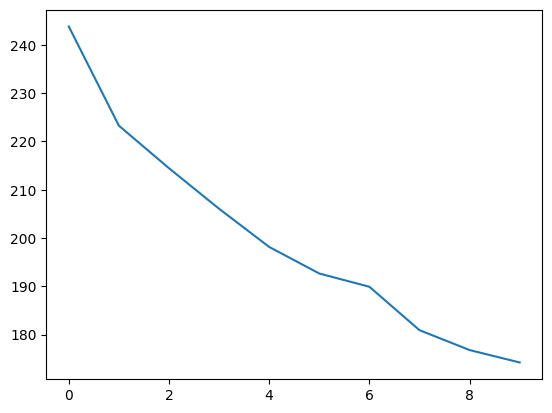

In [30]:
inertia = finding_elbow(10)
plt.plot(inertia)

In [58]:
# a function to return silhouette scores to determine optimal number of clusters
def finding_silhouette_score(num):
  for i in range(2, num+1):
    clusters = KMeans(n_clusters = i).fit_predict(X_scaled)
    sill_score = silhouette_score(X_scaled, clusters)
    print(f'for n_clusters = {i}, the sillhouette score is {sill_score}')

In [59]:
finding_silhouette_score(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


for n_clusters = 2, the sillhouette score is 0.07144564977462452
for n_clusters = 3, the sillhouette score is 0.06457733247216718
for n_clusters = 4, the sillhouette score is 0.05167556475821858
for n_clusters = 5, the sillhouette score is 0.05287132864971486
for n_clusters = 6, the sillhouette score is 0.036135705573074266
for n_clusters = 7, the sillhouette score is 0.038386372777068654
for n_clusters = 8, the sillhouette score is 0.03426784921557315
for n_clusters = 9, the sillhouette score is 0.0359072848642808
for n_clusters = 10, the sillhouette score is 0.04007979891028596


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [54]:
#Looking at the elbow plot and the silhouette score and the problem at hand, we will set n_clusters = 5

In [50]:
#predicting the clusters

Kmeans = KMeans(n_clusters = 5)
clusters = Kmeans.fit_predict(X_pca)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 2, 1, 1, 4, 4, 4, 4, 4, 4, 1, 4, 2, 2, 4, 2, 2, 2, 3, 2, 3, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 0, 2, 0, 0,
       1, 0, 0, 1, 4, 4, 1, 1, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int32)

In [55]:
df['Clusters'] = clusters

In [56]:
newdf = df[['Clusters', 'author']]
newdf['author encoded'] = y
newdf.head()

<ipython-input-56-009ea8695cd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['author encoded'] = y


,Clusters,author,author encoded
0,4,dispt,dispt
1,2,dispt,dispt
2,1,dispt,dispt
3,1,dispt,dispt
4,4,dispt,dispt


In [57]:
newdf.groupby('Clusters')['author'].value_counts()

Clusters  author  
0         Jay          3
          HM           2
          Madison      1
1         dispt        3
          Jay          2
          Madison      2
2         Hamilton    16
          HM           1
          dispt        1
3         Hamilton    33
4         Madison     12
          dispt        7
          Hamilton     2
Name: author, dtype: int64

### We can see that in the cluster 4, there are majority of Madison-written papers and majority of the disputed papers.
### This means that in cluster 4, Madison written papers and disputed papers are closely associated, which hints us that Madison is most likely the author of the disputed papers.